# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.ensemble import RandomForestRegressor ,RandomForestClassifier
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

# Importing Dataset

In [ ]:
dataset=pd.read_csv('healthcare_dataset.csv')
dataset.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

# Changing Data Type From Object To Datetime

In [ ]:
for date in ['Date of Admission','Discharge Date']:
   dataset[date] = pd.to_datetime(dataset[date])

# Number Of Days Patients Got Admitted in Hospital

In [ ]:
dataset['Days Hospitalized'] = (dataset['Discharge Date'] - dataset['Date of Admission']).dt.days
dataset['Days Hospitalized'] = dataset['Days Hospitalized'].astype(int)
dataset['Days Hospitalized']

0       14
1       14
2       30
3        1
4       24
        ..
9995     4
9996    23
9997    14
9998    20
9999    24
Name: Days Hospitalized, Length: 10000, dtype: int64

# Columns Irrelevant To Our Analysis

In [ ]:
dataset = dataset.drop(columns = ['Name','Date of Admission','Discharge Date','Room Number','Hospital','Insurance Provider','Billing Amount'])
dataset.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Admission Type', 'Medication', 'Test Results', 'Days Hospitalized'],
      dtype='object')

In [ ]:
print(dataset.shape)
dataset.head()

(10000, 9)


,Age,Gender,Blood Type,Medical Condition,Doctor,Admission Type,Medication,Test Results,Days Hospitalized
0,81,Female,O-,Diabetes,Patrick Parker,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,Diane Jackson,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Paul Baker,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Brian Chandler,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,Dustin Griffin,Urgent,Paracetamol,Normal,24


# Exploratory Data Analysis

In [ ]:
frequency_table = dataset['Medical Condition'].value_counts()
print(frequency_table)

Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64


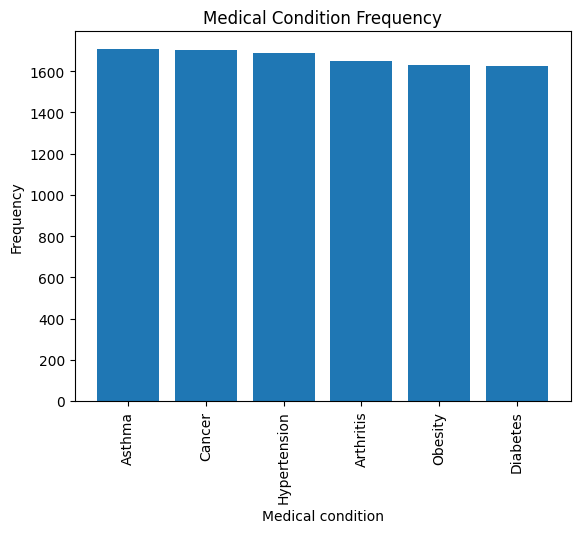

In [ ]:
plt.bar(frequency_table.index,frequency_table.values)
plt.title("Medical Condition Frequency")
plt.xlabel("Medical condition")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [ ]:
frequency_table = dataset['Admission Type'].value_counts()
print(frequency_table)

Admission Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64


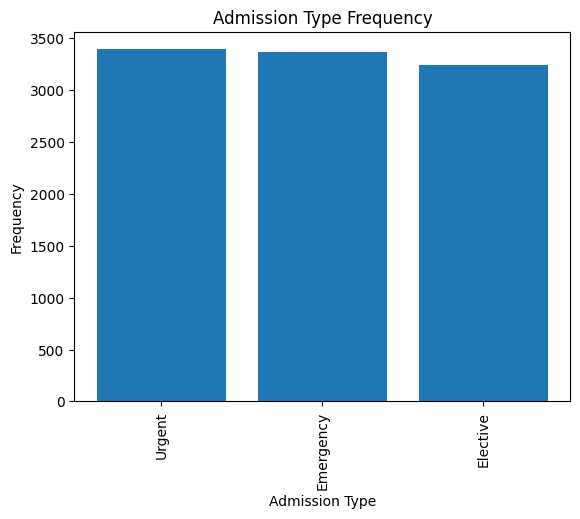

In [ ]:
plt.bar(frequency_table.index,frequency_table.values)
plt.title('Admission Type Frequency')
plt.xlabel('Admission Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
frequency_table = dataset['Doctor'].value_counts()[:20]
print(frequency_table)

Doctor
Michael Johnson      7
Robert Brown         5
Michelle Anderson    5
Matthew Smith        5
Jennifer Smith       5
James Williams       5
James Perez          5
Michael Smith        5
David Johnson        4
Christopher Davis    4
Robert Miller        4
William Rodriguez    4
Christopher Jones    4
Michael Brown        4
Ashley Jackson       4
Jessica Johnson      3
Joshua Smith         3
James Sanchez        3
Jennifer Jones       3
Joseph Morales       3
Name: count, dtype: int64


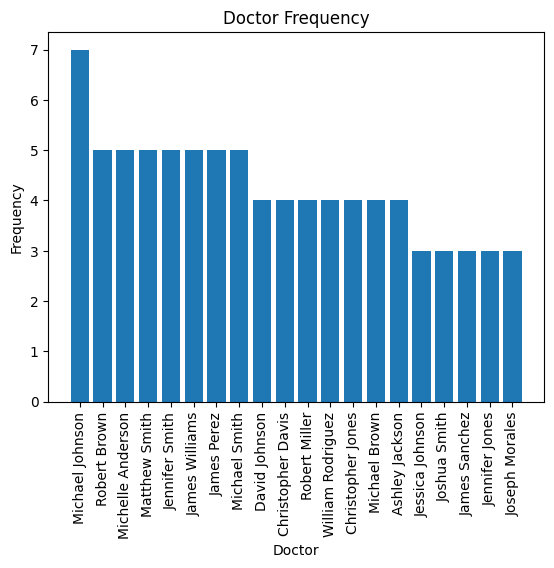

In [ ]:
plt.bar(frequency_table.index,frequency_table.values)
plt.title('Doctor Frequency')
plt.xlabel('Doctor')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Histogram Based On Age

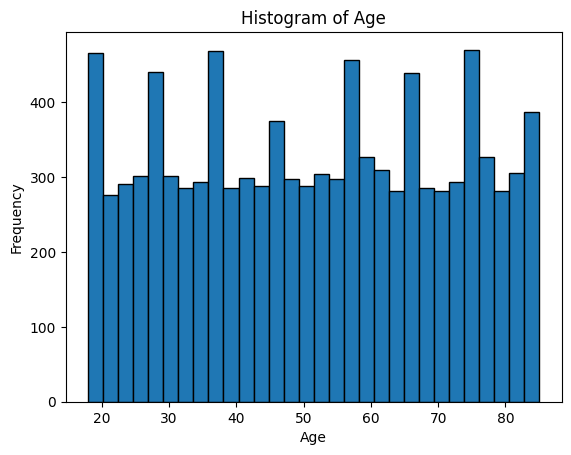

In [ ]:
plt.hist(dataset['Age'],bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

# Box Plot Of Medical Condition By Age

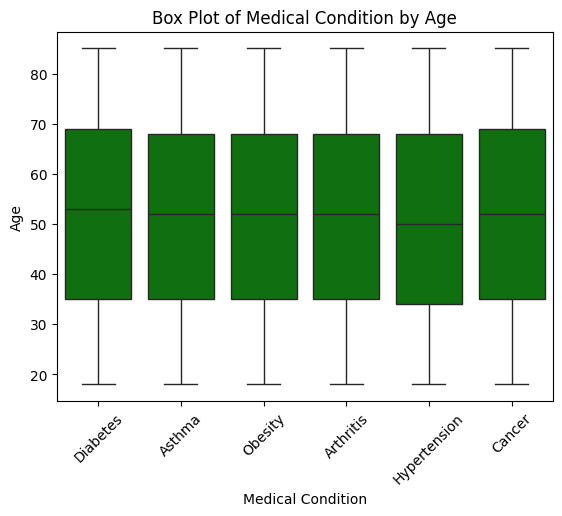

In [ ]:
sns.boxplot(data=dataset, x="Medical Condition", y="Age", color="Green")
plt.xticks(rotation=45)
plt.title('Box Plot of Medical Condition by Age')
plt.show()

# Scatter Plot

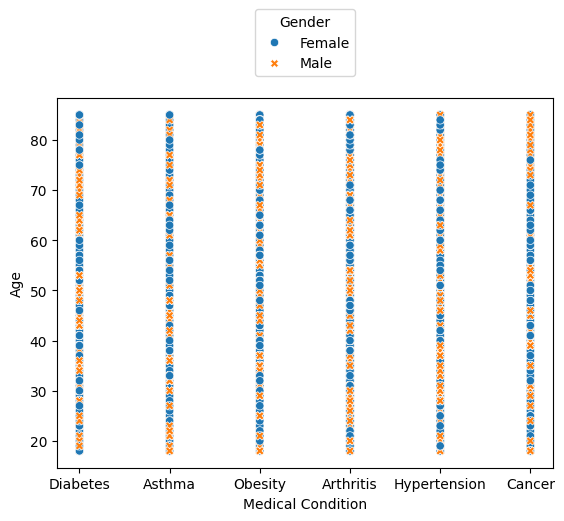

In [ ]:
sns.scatterplot(data=dataset,x="Medical Condition", y="Age",hue="Gender",style="Gender")
plt.legend(bbox_to_anchor=(.5, 1.15),loc='center', title='Gender')
plt.show()

# Correlation Of All Columns

In [ ]:
dataset.corr(method='pearson',numeric_only=True)

,Age,Days Hospitalized
Age,1.000000,0.009111
Days Hospitalized,0.009111,1.000000


# Describe

In [ ]:
dataset.describe()

,Age,Days Hospitalized
count,10000.000000,10000.000000
mean,51.452200,15.561800
std,19.588974,8.612038
min,18.000000,1.000000
25%,35.000000,8.000000
50%,52.000000,16.000000
75%,68.000000,23.000000
max,85.000000,30.000000


#  Summary Of Statistics Pertaining To The DataFrame's Categorical Columns

In [ ]:
dataset.describe(include = 'O')

,Gender,Blood Type,Medical Condition,Doctor,Admission Type,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000
unique,2,8,6,9416,3,5,3
top,Female,AB-,Asthma,Michael Johnson,Urgent,Penicillin,Abnormal
freq,5075,1275,1708,7,3391,2079,3456


In [ ]:
dataset.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Admission Type', 'Medication', 'Test Results', 'Days Hospitalized'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                10000 non-null  int64 
 1   Gender             10000 non-null  object
 2   Blood Type         10000 non-null  object
 3   Medical Condition  10000 non-null  object
 4   Doctor             10000 non-null  object
 5   Admission Type     10000 non-null  object
 6   Medication         10000 non-null  object
 7   Test Results       10000 non-null  object
 8   Days Hospitalized  10000 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 703.2+ KB


In [ ]:
dataset.isnull().sum()

Age                  0
Gender               0
Blood Type           0
Medical Condition    0
Doctor               0
Admission Type       0
Medication           0
Test Results         0
Days Hospitalized    0
dtype: int64

In [ ]:
print(dataset.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


In [ ]:
dataset['Test Results'].unique()

array(['Inconclusive', 'Normal', 'Abnormal'], dtype=object)

# Model Training

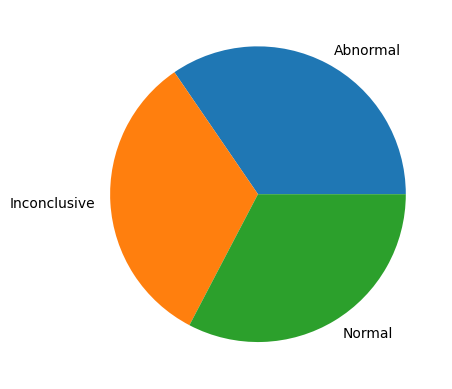

In [ ]:
a = np.array([3456, 3277, 3267])
mylabels = ['Abnormal', 'Inconclusive', 'Normal']

plt.pie(a, labels = mylabels)
plt.show()

In [ ]:
Abnormal_test_results = dataset['Test Results'] == 'Abnormal'
dataset[Abnormal_test_results]

,Age,Gender,Blood Type,Medical Condition,Doctor,Admission Type,Medication,Test Results,Days Hospitalized
3,49,Male,B-,Asthma,Brian Chandler,Urgent,Penicillin,Abnormal,1
5,41,Male,AB+,Arthritis,Robin Green,Urgent,Aspirin,Abnormal,3
6,82,Male,AB+,Hypertension,Patricia Bishop,Urgent,Lipitor,Abnormal,24
8,33,Male,A+,Diabetes,Kristin Dunn,Elective,Aspirin,Abnormal,5
10,45,Male,B-,Cancer,Anthony Roberts,Emergency,Penicillin,Abnormal,28
...,...,...,...,...,...,...,...,...,...
9983,74,Male,AB-,Obesity,Thomas Huber,Elective,Aspirin,Abnormal,14
9986,18,Male,B+,Obesity,Jennifer Williams,Emergency,Ibuprofen,Abnormal,4
9989,47,Female,B+,Arthritis,Jason Simmons,Elective,Aspirin,Abnormal,23
9995,83,Male,A+,Obesity,Samuel Moody,Elective,Ibuprofen,Abnormal,4


In [ ]:
Normal_test_results = dataset['Test Results'] == 'Normal'
dataset[Normal_test_results]

,Age,Gender,Blood Type,Medical Condition,Doctor,Admission Type,Medication,Test Results,Days Hospitalized
1,35,Male,O+,Asthma,Diane Jackson,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Paul Baker,Emergency,Lipitor,Normal,30
4,51,Male,O-,Arthritis,Dustin Griffin,Urgent,Paracetamol,Normal,24
7,55,Female,O-,Arthritis,Brian Kennedy,Elective,Aspirin,Normal,17
9,39,Female,O-,Asthma,Jessica Bailey,Urgent,Aspirin,Normal,1
...,...,...,...,...,...,...,...,...,...
9992,37,Male,O+,Hypertension,James May,Urgent,Penicillin,Normal,6
9993,39,Male,O-,Hypertension,Stephen Evans,Urgent,Lipitor,Normal,11
9996,47,Female,AB+,Arthritis,Christopher Yates,Emergency,Ibuprofen,Normal,23
9997,54,Male,B-,Arthritis,Robert Nicholson,Elective,Ibuprofen,Normal,14


In [ ]:
Inconclusive_test_results = dataset['Test Results'] == 'Inconclusive'
dataset[Inconclusive_test_results]

,Age,Gender,Blood Type,Medical Condition,Doctor,Admission Type,Medication,Test Results,Days Hospitalized
0,81,Female,O-,Diabetes,Patrick Parker,Elective,Aspirin,Inconclusive,14
11,23,Female,O-,Hypertension,William Miller,Emergency,Paracetamol,Inconclusive,17
12,85,Female,A+,Diabetes,Laura Roberts,Elective,Aspirin,Inconclusive,15
14,65,Female,AB+,Cancer,Katherine Lowe,Emergency,Ibuprofen,Inconclusive,20
15,32,Female,O+,Arthritis,Curtis Smith,Emergency,Aspirin,Inconclusive,7
...,...,...,...,...,...,...,...,...,...
9979,63,Female,B-,Cancer,Angela Baker,Urgent,Penicillin,Inconclusive,20
9985,72,Male,AB+,Hypertension,Martin Lopez,Urgent,Lipitor,Inconclusive,12
9987,84,Female,O-,Obesity,Mario Gomez,Urgent,Ibuprofen,Inconclusive,21
9990,35,Male,A+,Arthritis,Paul Bell,Urgent,Lipitor,Inconclusive,14


In [ ]:
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition']
numerical_columns = ['Age']

X = dataset[categorical_columns + numerical_columns]
y = dataset['Test Results']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns,)
    ],
    remainder='passthrough'
)
X = preprocessor.fit_transform(X)

In [ ]:
x_for_understanding = pd.DataFrame(X.toarray(), columns=preprocessor.get_feature_names_out())
display(x_for_understanding.head())
x_for_understanding.columns

,cat__Gender_Male,cat__Blood Type_A-,cat__Blood Type_AB+,cat__Blood Type_AB-,cat__Blood Type_B+,cat__Blood Type_B-,cat__Blood Type_O+,cat__Blood Type_O-,cat__Medical Condition_Asthma,cat__Medical Condition_Cancer,cat__Medical Condition_Diabetes,cat__Medical Condition_Hypertension,cat__Medical Condition_Obesity,remainder__Age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,81.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,35.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,61.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,51.0


Index(['cat__Gender_Male', 'cat__Blood Type_A-', 'cat__Blood Type_AB+',
       'cat__Blood Type_AB-', 'cat__Blood Type_B+', 'cat__Blood Type_B-',
       'cat__Blood Type_O+', 'cat__Blood Type_O-',
       'cat__Medical Condition_Asthma', 'cat__Medical Condition_Cancer',
       'cat__Medical Condition_Diabetes',
       'cat__Medical Condition_Hypertension', 'cat__Medical Condition_Obesity',
       'remainder__Age'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7)

In [ ]:
X_train

<8000x14 sparse matrix of type '<class 'numpy.float64'>'
	with 25653 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

4989    Inconclusive
4498          Normal
8876    Inconclusive
670     Inconclusive
9552          Normal
            ...     
919         Abnormal
4307    Inconclusive
5699          Normal
537         Abnormal
9412          Normal
Name: Test Results, Length: 8000, dtype: object

# Feature Scaling

In [ ]:
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [ ]:
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred_train = log.predict(X_train)

In [ ]:
train_accuracy = accuracy_score(y_train, y_pred_train) * 100
print("Training Accuracy:", train_accuracy)

Training Accuracy: 35.175


## Check for overfitting and underfitting

In [ ]:
print('Training set score: {:.4f}'.format(log.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(log.score(X_test, y_test)))

Training set score: 0.3518
Test set score: 0.3210


# Perform cross-validation on the training data

In [ ]:
LR_cross_val_scores = cross_val_score(log,X_train, y_train, cv=5)
print("Logistic Regression Cross-Validation Scores:", LR_cross_val_scores*100)
print("Logistic Regression Mean Value:",np.mean(LR_cross_val_scores)*100)

log.fit(X_train, y_train)

Logistic Regression Cross-Validation Scores: [34.8125 33.375  32.0625 33.375  32.625 ]
Logistic Regression Mean Value: 33.24999999999999


LogisticRegression(random_state=0)

# Decision Tree Classifier

In [ ]:
classifier = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=5,min_samples_leaf=3, random_state=20)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=20)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print("Training Accuracy:", accuracy)

Training Accuracy: 32.7


## Check for overfitting and underfitting

In [ ]:
print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)*100))
print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)*100))

Training set score: 36.5750
Test set score: 32.7000


# Perform cross-validation on the training data

In [ ]:
DT_cross_val_scores = cross_val_score(classifier,X_train, y_train, cv=5)
print("Cross-Validation Scores:", DT_cross_val_scores*100)
print("Decesion Tree Mean Value:",np.mean(DT_cross_val_scores)*100)

classifier.fit(X_train, y_train)

Cross-Validation Scores: [33.875  33.125  33.375  35.     33.8125]
Decesion Tree Mean Value: 33.8375


DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=20)

# Random Forest Classifier

In [ ]:
ran= RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
ran.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred=ran.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print("Training Accuracy:", accuracy)

Training Accuracy: 33.0


## Check for overfitting and underfitting

In [ ]:
print('Training set score: {:.4f}'.format(ran.score(X_train, y_train)*100))
print('Test set score: {:.4f}'.format(ran.score(X_test, y_test)*100))

Training set score: 72.4000
Test set score: 33.0000


# Perform cross-validation on the training data

In [ ]:
RF_cross_val_scores = cross_val_score(ran,X_train, y_train, cv=5)
print("Cross-Validation Scores:", RF_cross_val_scores*100)
print("Mean Value of Cross-Validation Scores:",np.mean(RF_cross_val_scores)*100)

ran.fit(X_train, y_train)

Cross-Validation Scores: [32.875  33.625  33.5625 31.8125 33.4375]
Mean Value of Cross-Validation Scores: 33.06250000000001


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Cross-Validation Mean Value Scores of 3 Model

In [ ]:
print("Decesion Tree Mean Value:",np.mean(DT_cross_val_scores)*100)
print("Logistic Regression Mean Value:",np.mean(LR_cross_val_scores)*100)
print("Random Forest Mean Value:",np.mean(RF_cross_val_scores)*100)

Decesion Tree Mean Value: 33.8375
Logistic Regression Mean Value: 33.24999999999999
Random Forest Mean Value: 33.06250000000001


# Classification Report

In [ ]:
print(classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

    Abnormal       0.34      0.39      0.37       649
Inconclusive       0.31      0.32      0.32       666
      Normal       0.33      0.28      0.30       685

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.33      0.33      0.33      2000

